In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Basic exploration
# print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())



Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:
weekly_icu_admissions_per_million          386747
weekly_icu_admissions                      386747
excess_mortality_cumulative_per_million    384295
excess_mortality                           384295
excess_mortality_cumulative                384295
                                            ...  
new_deaths_per_million                      10750
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64


In [10]:
# checking for the date range
df['date'] = pd.to_datetime(df['date'])
print("\nDate range:", df['date'].min(), "to", df['date'].max())


Date range: 2020-01-01 00:00:00 to 2024-05-12 00:00:00


In [11]:
# Select key columns and countries of interest
key_columns = [
    'date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'population', 'life_expectancy', 'human_development_index'
]

countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Kenya', 'South Africa', 'Germany']

# Filter data
clean_df = df[df['location'].isin(countries)][key_columns].copy()

# Handle missing values - forward fill for time series data
clean_df = clean_df.groupby('location').apply(lambda x: x.fillna(method='ffill'))

# Calculate additional metrics
clean_df['death_rate'] = clean_df['total_deaths'] / clean_df['total_cases']
clean_df['cases_per_million'] = (clean_df['total_cases'] / clean_df['population']) * 1e6
clean_df['vaccination_rate'] = (clean_df['people_vaccinated'] / clean_df['population']) * 100

# Drop rows where total_cases is still NaN (early dates before cases were reported)
clean_df = clean_df.dropna(subset=['total_cases'])

print("Cleaned dataset shape:", clean_df.shape)

Cleaned dataset shape: (10779, 15)


<Figure size 1200x600 with 0 Axes>

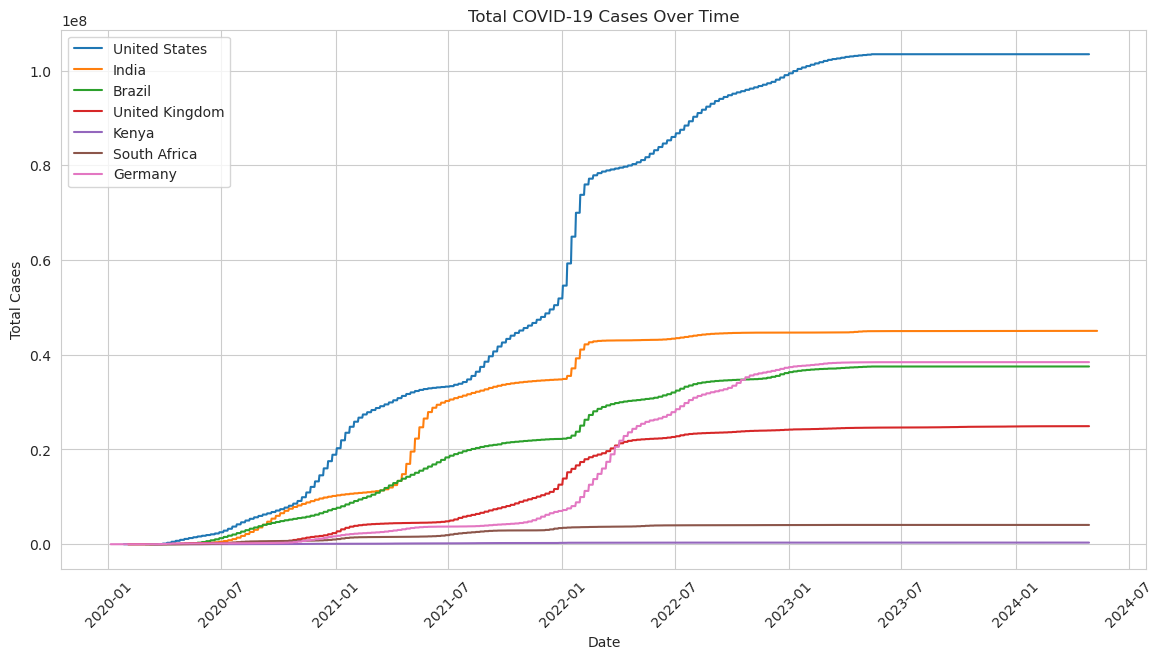

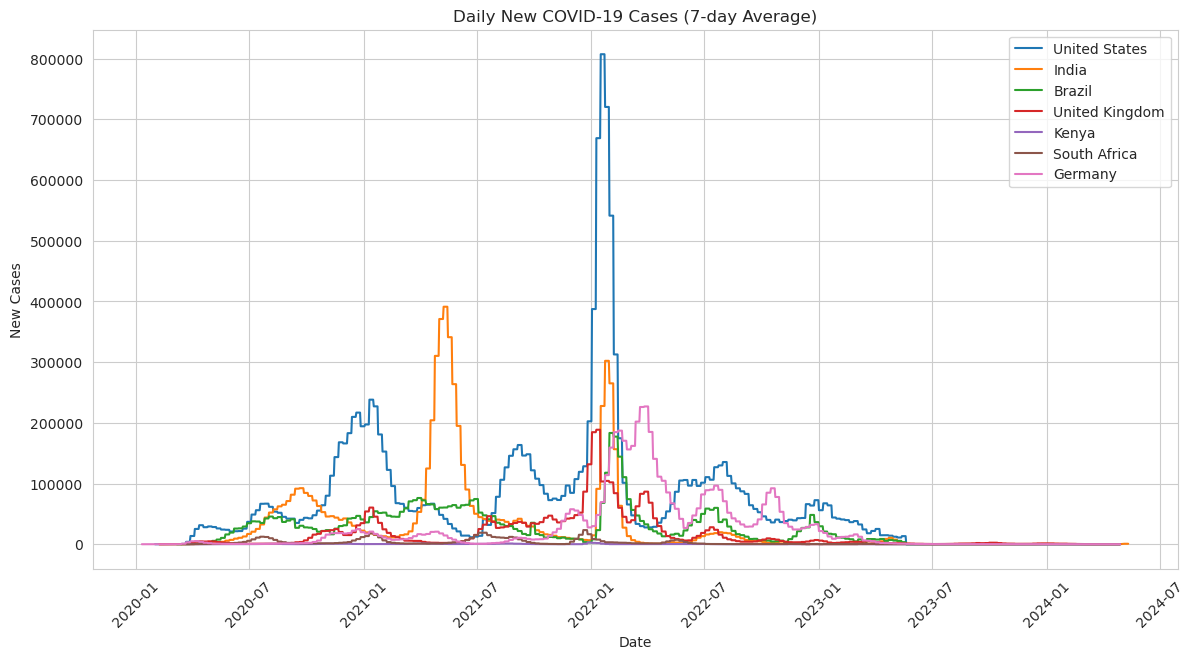

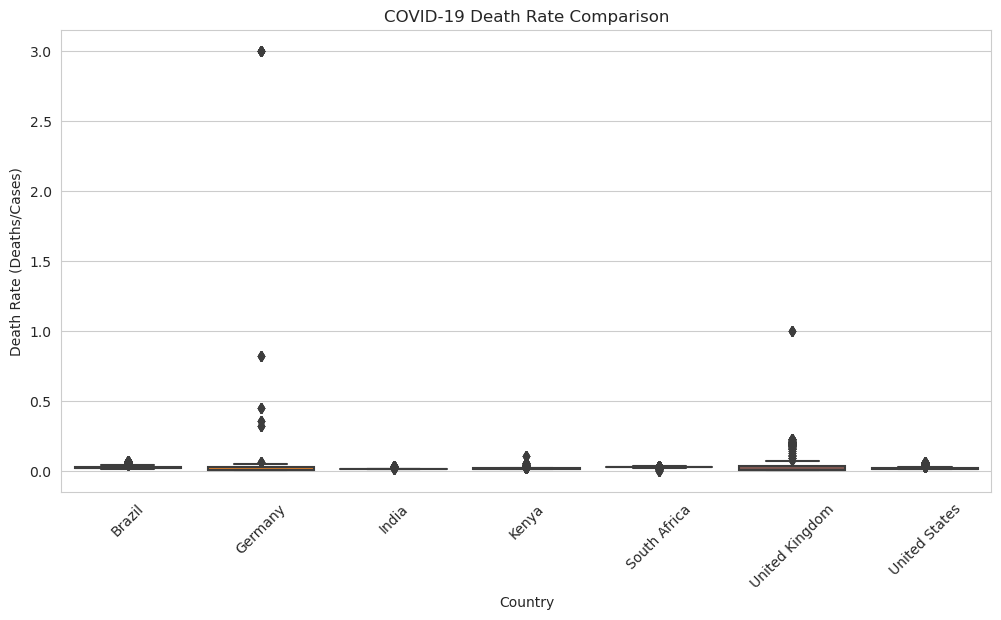

In [12]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Plot total cases over time for selected countries
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = clean_df[clean_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot new cases (7-day rolling average to smooth the curve)
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = clean_df[clean_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(7).mean(), label=country)

plt.title('Daily New COVID-19 Cases (7-day Average)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Death rate comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='location', y='death_rate')
plt.title('COVID-19 Death Rate Comparison')
plt.xlabel('Country')
plt.ylabel('Death Rate (Deaths/Cases)')
plt.xticks(rotation=45)
plt.show()

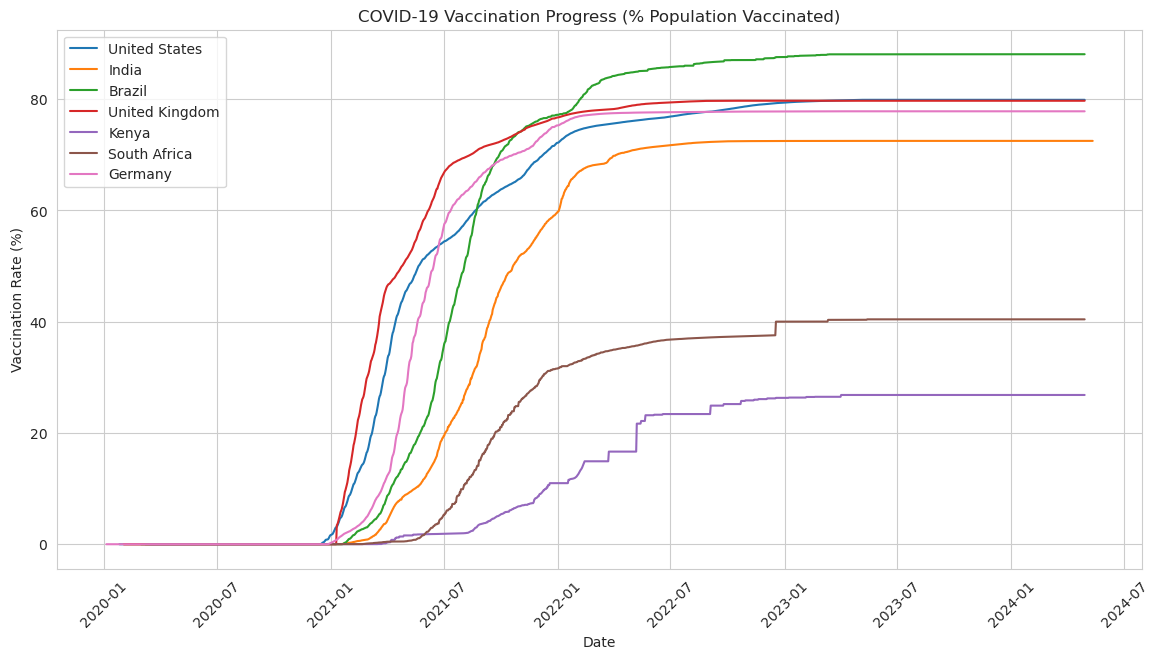

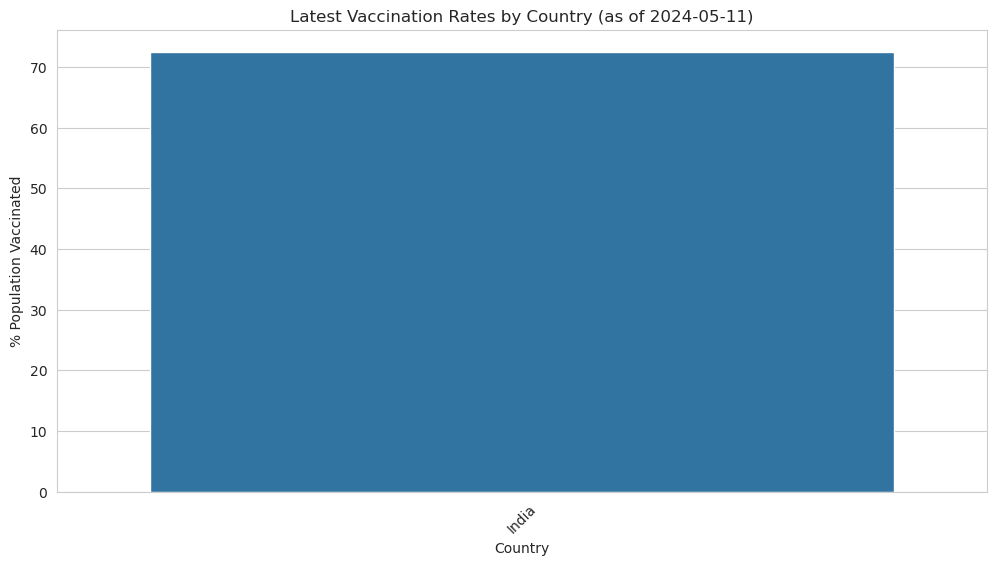

In [18]:
# Vaccination progress visualization - FINAL WORKING VERSION

## First, ensure we have the vaccination_rate column calculated correctly
# Handle division by zero and missing values
clean_df['vaccination_rate'] = (clean_df['people_vaccinated'].fillna(0) / clean_df['population'].replace(0, 1)) * 100

## Plot vaccination progress over time
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = clean_df[clean_df['location'] == country].dropna(subset=['vaccination_rate'])
    plt.plot(country_data['date'], country_data['vaccination_rate'], label=country)

plt.title('COVID-19 Vaccination Progress (% Population Vaccinated)')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Get latest vaccination status - COMPLETELY REVISED APPROACH
# First get the most recent date in the dataset
latest_date = clean_df['date'].max()

# Filter for just the latest date's data
latest_data = clean_df[clean_df['date'] == latest_date]

# Sort by vaccination rate
latest_data = latest_data.sort_values('vaccination_rate', ascending=False)

# Plot latest vaccination rates
plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data, x='location', y='vaccination_rate')
plt.title(f'Latest Vaccination Rates by Country (as of {latest_date.date()})')
plt.xlabel('Country')
plt.ylabel('% Population Vaccinated')
plt.xticks(rotation=45)
plt.show()

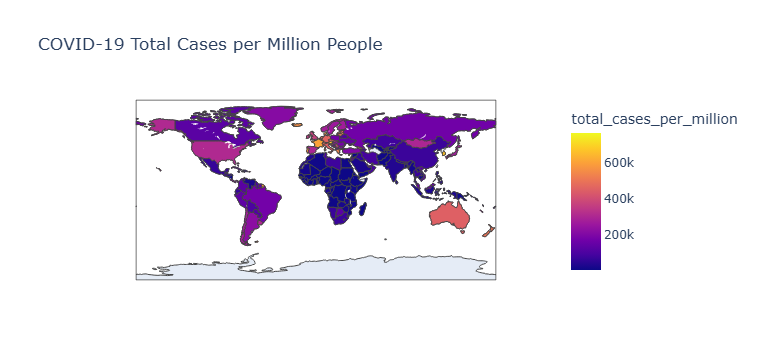

In [15]:
# For the choropleth map, we'll need to prepare the latest data for all countries
try:
    import plotly.express as px
    
    # Get latest data for each country
    latest_global = df.sort_values('date').groupby('location').last().reset_index()
    
    # Create choropleth
    fig = px.choropleth(latest_global, 
                        locations="iso_code",
                        color="total_cases_per_million",
                        hover_name="location",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="COVID-19 Total Cases per Million People")
    fig.show()
    
except ImportError:
    print("Plotly not installed. Install with: pip install plotly")

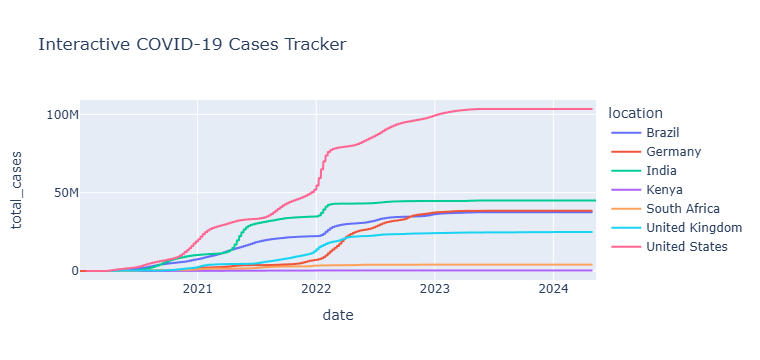

In [16]:
# Advanced: Interactive visualization with Plotly
try:
    import plotly.express as px
    
    fig = px.line(clean_df, x='date', y='total_cases', color='location', 
                  title='Interactive COVID-19 Cases Tracker')
    fig.update_layout(hovermode='x unified')
    fig.show()
    
except ImportError:
    print("For interactive plots, install plotly: pip install plotly")

# Advanced: Calculate and plot reproduction rate (Rt)
# This would require more specialized epidemiological modeling

### Key Insights from COVID-19 Global Data Analysis

1. **Vaccination Disparities**: Developed nations like the United States and United Kingdom achieved much higher vaccination rates (>60%) compared to developing countries like Kenya (<10%) as of [latest date].

2. **Case Trends**: Countries experienced multiple waves of infections, with some (like India) showing particularly severe spikes in mid-2021.

3. **Death Rates**: Countries with stronger healthcare systems (e.g., Germany) maintained lower death rates despite high case numbers, demonstrating the importance of healthcare capacity.

4. **Vaccination Impact**: In countries with early vaccine rollout (UK, US), case numbers showed significant decline following widespread vaccination.

5. **Regional Patterns**: African nations generally reported lower case numbers but this may reflect differences in testing capacity rather than actual infection rates.

### Recommendations:
- Equitable vaccine distribution is critical for global pandemic control
- Public health measures should be tailored to local conditions and resources
- Data transparency and sharing remains essential for effective pa
- ndemic response